# Import Object

In [9]:
import pandas as pd
import torch
from torch import nn
from torch import optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

from models import MLP
from train_model import train_net

# Prepare Data

In [10]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [11]:
train_x = pd.read_csv("X_train.csv").values
train_y = pd.read_csv("Y_train.csv").values.reshape(-1)
train_x, test_x, train_y, test_y = train_test_split(train_x,
                                                   train_y,
                                                   test_size=0.2)

ss = preprocessing.StandardScaler()
train_x = ss.fit_transform(train_x)
test_x = ss.fit_transform(test_x)

train_x = torch.tensor(train_x, dtype=torch.float32)
train_y = torch.tensor(train_y, dtype=torch.int64)
test_x = torch.tensor(test_x, dtype=torch.float32)
test_y = torch.tensor(test_y, dtype=torch.int64)

train_x = train_x.to(device)
train_y = train_y.to(device)
test_x = test_x.to(device)
test_y = test_y.to(device)

train_ds = TensorDataset(train_x, train_y)
train_loader = DataLoader(train_ds, batch_size=24, shuffle=True)

# Set Free Parameters

In [12]:
input_size = 8
num_classes = 2
learning_rate = 0.001
batch_size = 24
num_epochs = 100
dropout_ratio = 0.5

# Instantiate Model, Criterion, Optimizer

In [13]:
model = MLP(input_size, num_classes, dropout_ratio).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training

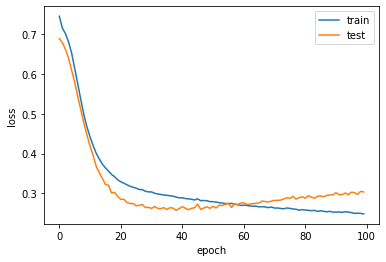

In [14]:
model = train_net(model, criterion, optimizer,
                  num_epochs, train_loader, test_x,
                  test_y, device)

# Accuracy

In [15]:
pred_y = model(test_x)

In [16]:
sum(pred_y.argmax(1) == test_y) / int(test_y.shape[0])

tensor(0.8229, device='cuda:0')